## ***In this notebook we will use the full ResNet50 model to make predictions on our own images***

---



In [42]:
# the images are in my google drive account, so we need to import drive

from google.colab import drive

In [43]:
# making the connection to Google drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***Importing libraries***

---



In [44]:
# the ResNet model has been trained with 1000 different labels
# import the ResNet model from Keras applications
# import the preprocess_input to transform our test images to the input that the ResNet50 model wants
# import decode_predictions to predict an actual output(label) from the model values
# import the image module in order to work with images easier

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
print('Imported Successfully!')

Imported Successfully!


***ResNet50 Model***

---



In [45]:
# create the model which is the ResNet50, trained on the imagenet dataset
# we could also load the resnet50 model with random weights, setting weights = None

model = ResNet50(weights='imagenet')

print('Model Downloaded Successfully!')

Model Downloaded Successfully!


In [46]:
# we can view the model
# there are around 25 millions parameters to train in the model
# but they have already been trained

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

***Preprocess our test image***

---




 Initial format: 
<class 'PIL.Image.Image'>
None
RGB
(224, 224)

 Initial array format: 
<class 'numpy.ndarray'>
(224, 224, 3)

 Format with a new dimension: 
<class 'numpy.ndarray'>
(1, 224, 224, 3)

 The format ResNet50 works with: 
<class 'numpy.ndarray'>
(1, 224, 224, 3)
Image Processing Done!


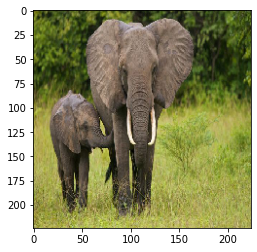

In [47]:
# my test image is located in my google drive, so the image path is to my gdrive
# eith the load_image funtion from the image module we load the image, specifying the size we want our image to be loaded
# it is 222x224 pixels size

img_path = '/content/gdrive/My Drive/elephant.jpg'

img = image.load_img(img_path, target_size=(224,224))
print("\n Initial format: ")
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
#img.show()

x = image.img_to_array(img)
print("\n Initial array format: ")
print(type(x))
print(x.shape)
plt.imshow(x/255.)

x = np.expand_dims(x,axis=0)
print("\n Format with a new dimension: ")
print(type(x))
print(x.shape)

x = preprocess_input(x)
print("\n The format ResNet50 works with: ")
print(type(x))
print(x.shape)

print('Image Processing Done!')

***Predict the label on our test image***

---



In [48]:
# use the predict function applied on the test image array to get the output of the ResNet50 model

pred = model.predict(x)

# decode the results into a list of tuples (class, description, probability)

print(decode_predictions(pred,top=3)[0])

[('n02504458', 'African_elephant', 0.8005748), ('n01871265', 'tusker', 0.18233964), ('n02504013', 'Indian_elephant', 0.012134507)]


We only showed the first 3 predictions, but we can show any number we like up to 1000. 
The result are shown in the form of a tuple - class, description and probability.
The model is about 80% sure that the image is an African elephant, 18% that it is a tuskar(another type of elephant) and 1.2% it is an Indian elephant. By looking at our image we can conclude that the network performed very well. 

---



***We will test the model on an image type it wasn't trained for***

---




 Initial format: 
<class 'PIL.Image.Image'>
None
RGB
(224, 224)

 Initial array format: 
<class 'numpy.ndarray'>
(224, 224, 3)

 Format with a new dimension: 
<class 'numpy.ndarray'>
(1, 224, 224, 3)

 The format ResNet50 works with: 
<class 'numpy.ndarray'>
(1, 224, 224, 3)
Image Processing Done!


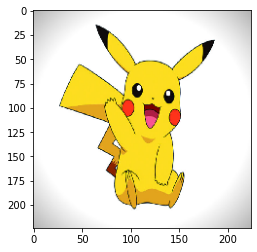

In [49]:
img_path = '/content/gdrive/My Drive/pikachu.jpg'

img = image.load_img(img_path, target_size=(224,224))
print("\n Initial format: ")
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
#img.show()

x = image.img_to_array(img)
print("\n Initial array format: ")
print(type(x))
print(x.shape)
plt.imshow(x/255.)

x = np.expand_dims(x,axis=0)
print("\n Format with a new dimension: ")
print(type(x))
print(x.shape)

x = preprocess_input(x)
print("\n The format ResNet50 works with: ")
print(type(x))
print(x.shape)


print('Image Processing Done!')

In [50]:
# use the predict function applied on the test image array to get the output of the ResNet50 model

pred = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print(decode_predictions(pred,top=7)[0])

[('n03944341', 'pinwheel', 0.58748895), ('n03063599', 'coffee_mug', 0.038898792), ('n04447861', 'toilet_seat', 0.033768825), ('n03271574', 'electric_fan', 0.02392927), ('n02951585', 'can_opener', 0.0164328), ('n04254120', 'soap_dispenser', 0.01468931), ('n03642806', 'laptop', 0.014349882)]


We only showed the first 3 predictions, but we can show any number we like up to 1000. The result are shown in the form of a tuple - class, description and probability. The model is about 58% sure that the image is a pinwheel, 3.8% that it is a coffee mug and 3.3% it is a toilet seat. By looking at our image we can conclude that the model couldn't predict the accurate label, because most probably the model wasn't trained with images of pikachu.